# Coffee Classification Project 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (20,7)
import warnings
warnings.filterwarnings('ignore')



## Cargado y Limpieza de datos

In [4]:
df = pd.read_csv('merged_data_cleaned.csv')
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1182 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

Primero notar, que se trabajarán con variables como la especie (Target), el país de origen, la variedad, la altura, el método de procesado, entre otras.

In [6]:
df_Final = df[["Species","Country.of.Origin", "Harvest.Year", "Variety", "Processing.Method", "Category.One.Defects", "Category.Two.Defects", "Quakers", "altitude_mean_meters", "Total.Cup.Points"]]

In [7]:
df_Final

,Species,Country.of.Origin,Harvest.Year,Variety,Processing.Method,Category.One.Defects,Category.Two.Defects,Quakers,altitude_mean_meters,Total.Cup.Points
0,Arabica,Ethiopia,2014,NaN,Washed / Wet,0,0,0.0,2075.0,90.58
1,Arabica,Ethiopia,2014,Other,Washed / Wet,0,1,0.0,2075.0,89.92
2,Arabica,Guatemala,NaN,Bourbon,NaN,0,0,0.0,1700.0,89.75
3,Arabica,Ethiopia,2014,NaN,Natural / Dry,0,2,0.0,2000.0,89.00
4,Arabica,Ethiopia,2014,Other,Washed / Wet,0,2,0.0,2075.0,88.83
...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,Ecuador,2016,NaN,NaN,0,1,0.0,NaN,78.75
1335,Robusta,Ecuador,2016,NaN,NaN,0,0,0.0,40.0,78.08
1336,Robusta,United States,2014,NaN,Natural / Dry,0,6,0.0,795.0,77.17
1337,Robusta,India,2013,NaN,Natural / Dry,20,1,0.0,NaN,75.08


Valores Perdidos

In [8]:
df_Final.isna().sum()

Species                   0
Country.of.Origin         1
Harvest.Year             47
Variety                 226
Processing.Method       170
Category.One.Defects      0
Category.Two.Defects      0
Quakers                   1
altitude_mean_meters    230
Total.Cup.Points          0
dtype: int64

Por la naturaleza de los datos se procederá a dropear los NaN

In [9]:
df_Final.dropna(inplace=True)

In [10]:
df_Final.reset_index(inplace=True)

In [11]:
df_Final.drop(["index"], axis = 1, inplace=True)

duplicados

In [12]:
df.duplicated().any()

False

## Análisis Estadístico y Exploratorio

In [13]:
df_Final.describe()

,Category.One.Defects,Category.Two.Defects,Quakers,altitude_mean_meters,Total.Cup.Points
count,975.000000,975.000000,975.000000,975.000000,975.000000
mean,0.400000,3.723077,0.141538,1835.134249,82.078636
std,1.963737,5.457059,0.725360,9241.496099,2.607844
min,0.000000,0.000000,0.000000,1.000000,59.830000
25%,0.000000,0.000000,0.000000,1100.000000,81.170000
50%,0.000000,2.000000,0.000000,1310.640000,82.420000
75%,0.000000,5.000000,0.000000,1600.000000,83.500000
max,31.000000,47.000000,11.000000,190164.000000,89.920000


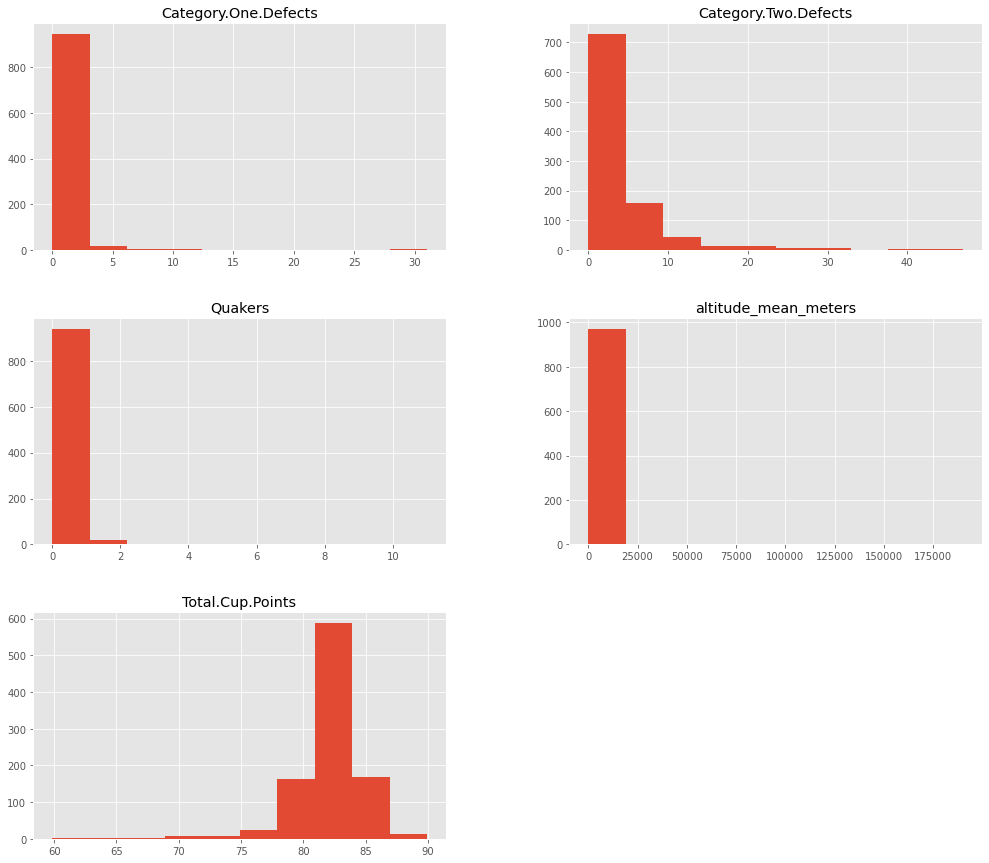

In [14]:
num_bins = 10
df_Final.hist(bins = num_bins, figsize=(17,15))
plt.show()

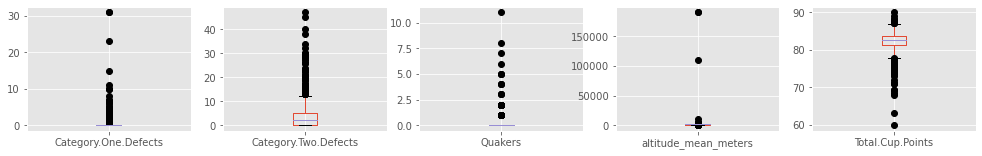

In [15]:
fig = plt.figure(figsize = (17,16))
ax = fig.gca()
df_Final.rename(columns=lambda x: str(x)).plot(ax=ax, kind= 'box', subplots=True, layout=(6,5), sym='black')
plt.show()

<AxesSubplot:xlabel='Category.One.Defects', ylabel='count'>

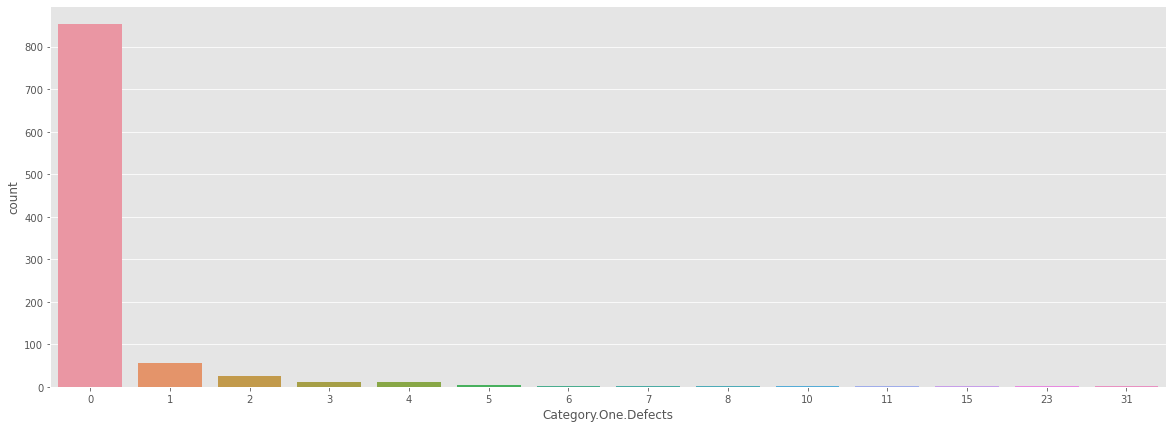

In [16]:
sns.countplot(x="Category.One.Defects", data=df_Final)

<AxesSubplot:xlabel='Category.Two.Defects', ylabel='count'>

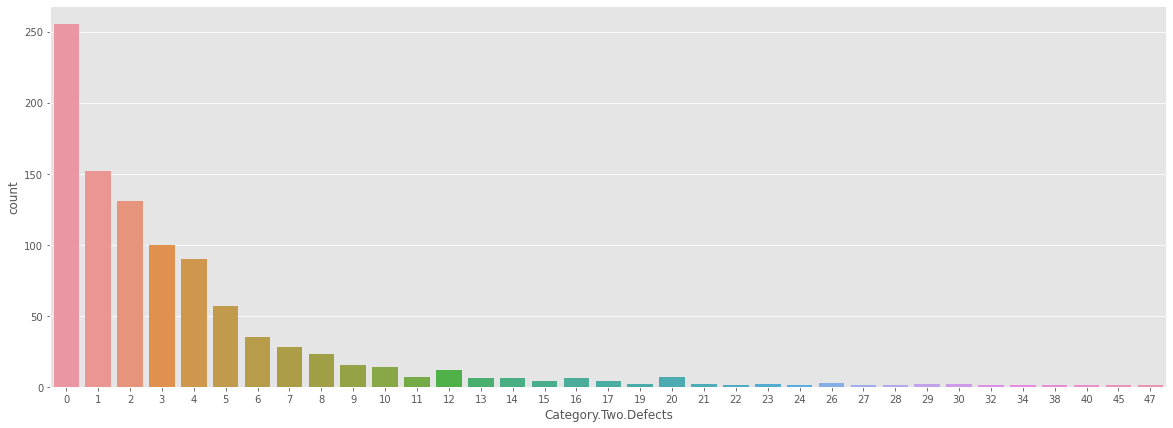

In [17]:
sns.countplot(x="Category.Two.Defects", data=df_Final)

<AxesSubplot:xlabel='Quakers', ylabel='count'>

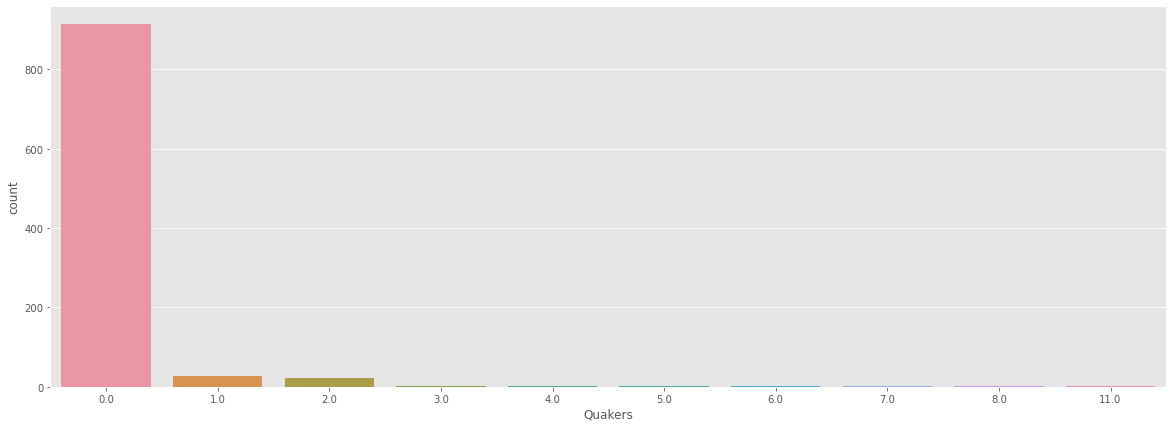

In [18]:
sns.countplot(x="Quakers", data=df_Final)

<AxesSubplot:>

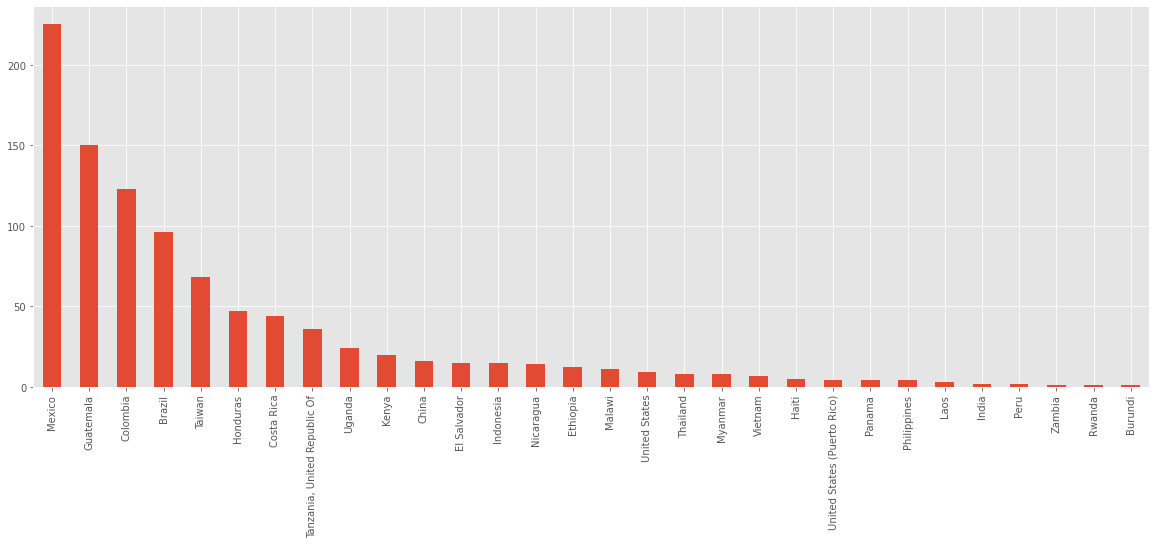

In [19]:
df_Final['Country.of.Origin'].value_counts().plot(kind='bar')

<AxesSubplot:>

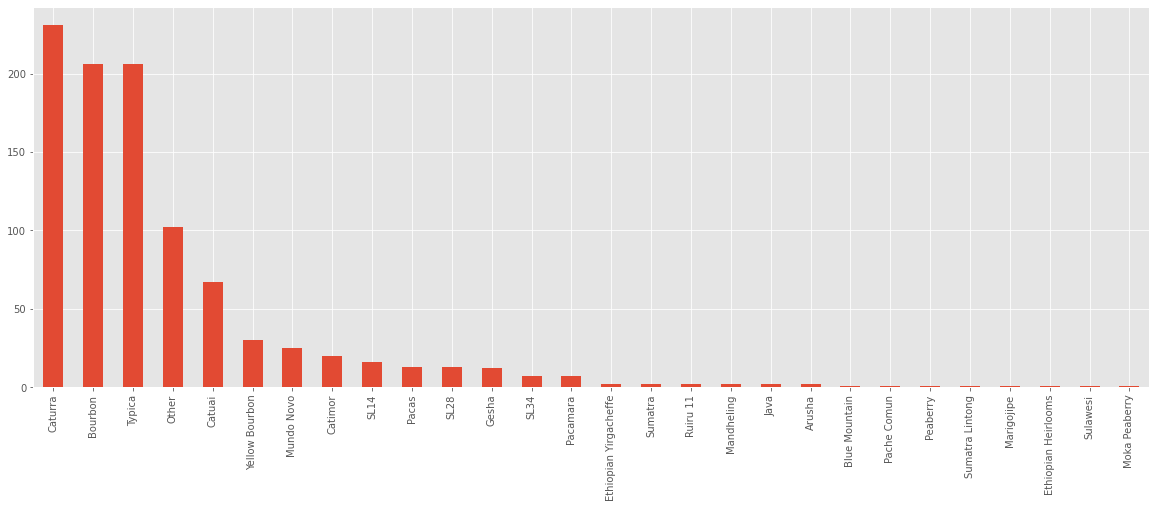

In [20]:
df_Final['Variety'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Processing.Method', ylabel='count'>

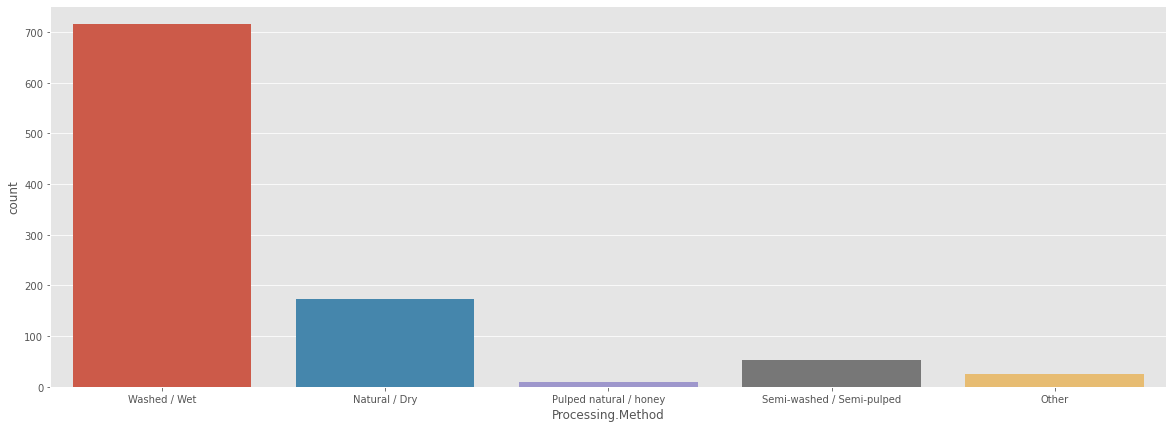

In [21]:
sns.countplot(x="Processing.Method", data=df_Final)

Gráficos enfocados al puntaje en taza del café

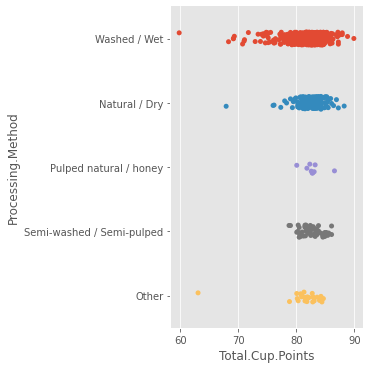

In [22]:
sns.catplot(x="Total.Cup.Points", y="Processing.Method", data=df_Final)

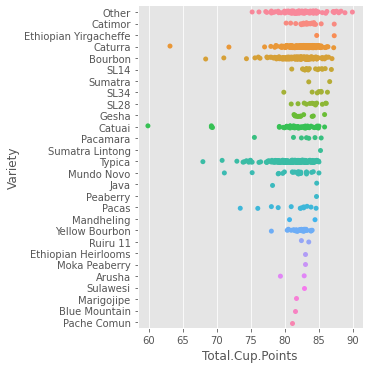

In [23]:
sns.catplot(x="Total.Cup.Points", y="Variety", data=df_Final)

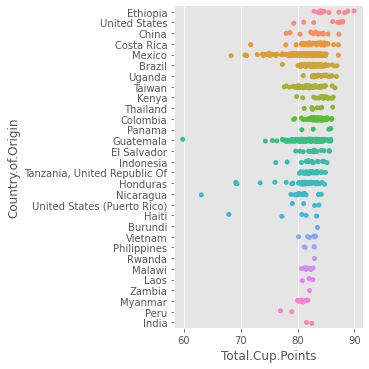

In [24]:
sns.catplot(x="Total.Cup.Points", y="Country.of.Origin", data=df_Final)

<AxesSubplot:xlabel='Species', ylabel='count'>

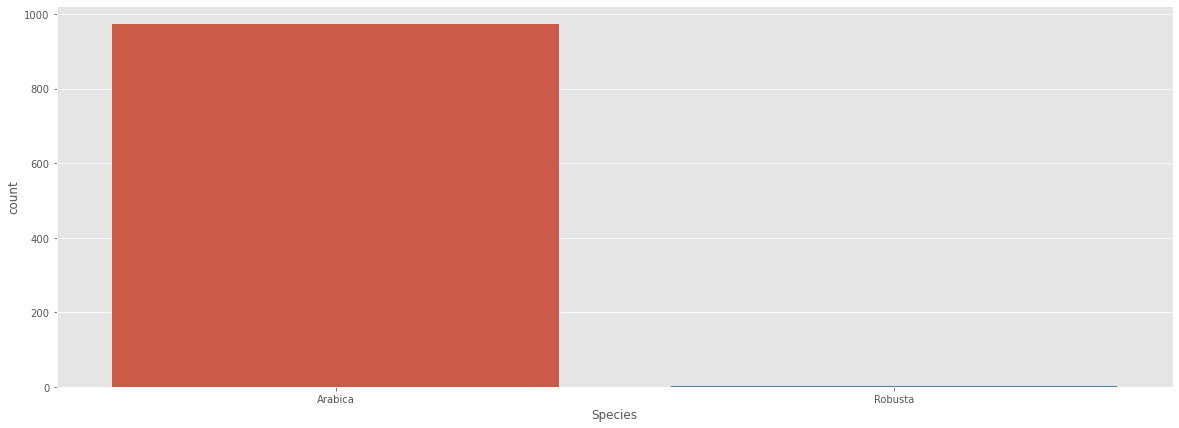

In [25]:
sns.countplot(x="Species", data=df_Final)

In [26]:
np.round(df_Final['Species'].value_counts(normalize=True)*100, 3)

Arabica    99.692
Robusta     0.308
Name: Species, dtype: float64

Se aprecia un claro desbalance en la variable target. Esto será tratado en la fase de modelado.

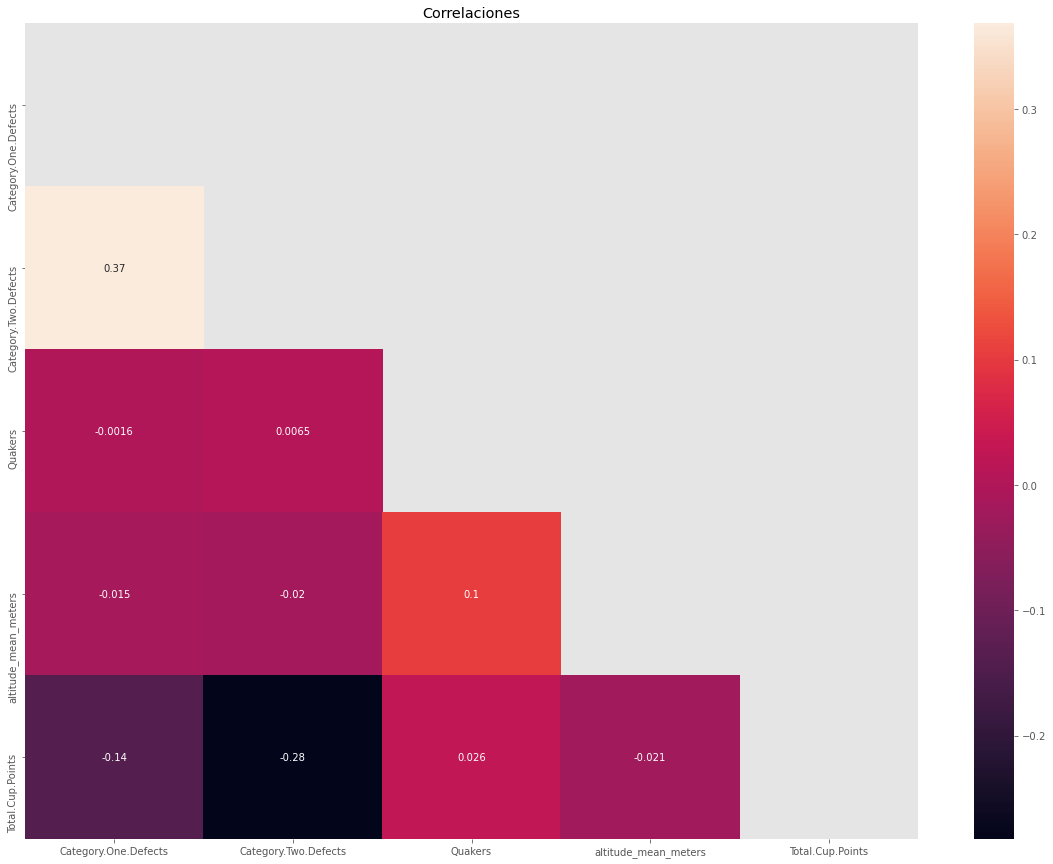

In [27]:
plt.rcParams['figure.figsize'] = (20, 15)

data_corr = df_Final.corr()

mask = np.triu(np.ones_like(data_corr, dtype=bool))

sns.heatmap(data_corr, annot = True, mask=mask)
plt.title('Correlaciones')
plt.show()

## Modelado

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



### Encoding

In [29]:
df_Final.head()

,Species,Country.of.Origin,Harvest.Year,Variety,Processing.Method,Category.One.Defects,Category.Two.Defects,Quakers,altitude_mean_meters,Total.Cup.Points
0,Arabica,Ethiopia,2014,Other,Washed / Wet,0,1,0.0,2075.0,89.92
1,Arabica,Ethiopia,2014,Other,Washed / Wet,0,2,0.0,2075.0,88.83
2,Arabica,Ethiopia,2014,Other,Natural / Dry,0,4,0.0,1822.5,88.25
3,Arabica,United States,2014,Other,Washed / Wet,0,0,0.0,1872.0,87.92
4,Arabica,United States,2014,Other,Washed / Wet,0,0,0.0,1943.0,87.92


In [30]:
labelencoder = LabelEncoder()

In [31]:
df_Final['Species'] = labelencoder.fit_transform(df_Final["Species"])
# 0 - Arábica
# 1 - Robusta

In [32]:
df_Final['Country.of.Origin'] = labelencoder.fit_transform(df_Final["Country.of.Origin"])
df_Final['Variety'] = labelencoder.fit_transform(df_Final["Variety"])
df_Final['Processing.Method'] = labelencoder.fit_transform(df_Final["Processing.Method"])

In [33]:
df_Final.head()

,Species,Country.of.Origin,Harvest.Year,Variety,Processing.Method,Category.One.Defects,Category.Two.Defects,Quakers,altitude_mean_meters,Total.Cup.Points
0,0,6,2014,14,4,0,1,0.0,2075.0,89.92
1,0,6,2014,14,4,0,2,0.0,2075.0,88.83
2,0,6,2014,14,0,0,4,0.0,1822.5,88.25
3,0,26,2014,14,4,0,0,0.0,1872.0,87.92
4,0,26,2014,14,4,0,0,0.0,1943.0,87.92


### Corrigiendo Año de Cosecha

In [34]:
df_Final['Harvest.Year'].value_counts().sort_index()

2011            14
2011/2012        1
2012           290
2013           138
2013/2014       29
2014           185
2014/2015       18
2015           116
2015/2016       26
2016            77
2016 / 2017      2
2017            61
2017 / 2018     17
2018             1
Name: Harvest.Year, dtype: int64

In [35]:
df_Final['Harvest.Year'].mask(df_Final['Harvest.Year'] == '2013/2014', 2014, inplace=True)
df_Final['Harvest.Year'].mask(df_Final['Harvest.Year'] == '2015/2016', 2016, inplace=True)
df_Final['Harvest.Year'].mask(df_Final['Harvest.Year'] == '2014/2015', 2015, inplace=True)
df_Final['Harvest.Year'].mask(df_Final['Harvest.Year'] == '2017 / 2018', 2018, inplace=True)
df_Final['Harvest.Year'].mask(df_Final['Harvest.Year'] == '2016 / 2017', 2017, inplace=True)
df_Final['Harvest.Year'].mask(df_Final['Harvest.Year'] == '2011/2012', 2012, inplace=True)

In [36]:
df_Final['Harvest.Year'] = df_Final['Harvest.Year'].astype(int)

In [37]:
df_Final['Harvest.Year'].value_counts().sort_index()

2011     14
2012    291
2013    138
2014    214
2015    134
2016    103
2017     63
2018     18
Name: Harvest.Year, dtype: int64

### Resampling con Smote

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
X = df_Final.loc[:,'Country.of.Origin':'Total.Cup.Points']

In [40]:
y = df_Final['Species']

In [41]:
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [42]:
smot = SMOTE(sampling_strategy='minority', k_neighbors=1)

In [43]:
y_train.value_counts()

0    680
1      2
Name: Species, dtype: int64

In [44]:
X_train_st, y_train_st = smot.fit_resample(X_train, y_train)
#Datos de entrenamiento
X_train_st= pd.DataFrame(X_train_st, columns=X.columns)
y_train_st= pd.DataFrame(y_train_st, columns=['Species'])

Df_train_smotetomek = pd.concat([X_train_st, y_train_st], axis=1)
Df_train_smotetomek.head()

,Country.of.Origin,Harvest.Year,Variety,Processing.Method,Category.One.Defects,Category.Two.Defects,Quakers,altitude_mean_meters,Total.Cup.Points,Species
0,9,2018,3,4,0,3,1.0,1200.0,81.58,0
1,15,2012,26,4,0,3,0.0,1200.0,84.67,0
2,12,2014,22,4,0,0,0.0,1800.0,84.75,0
3,15,2013,26,4,0,6,0.0,1400.0,81.67,0
4,15,2012,26,4,0,1,0.0,1250.0,82.08,0


In [45]:
y_train_st.value_counts()

Species
1          680
0          680
dtype: int64

In [53]:
scaler = StandardScaler()

scaler.fit(X_train_st)
X_train_st = scaler.transform(X_train_st)
X_test = scaler.transform(X_test)

In [54]:
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score

In [55]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [57]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train_st, y_train_st), (X_test, y_test)]
    
    clf.fit(X_train_st, y_train_st,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [58]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.9761092150170648                                     
SCORE:                                                                            
0.9453924914675768                                                                
SCORE:                                                                            
0.7303754266211604                                                                
SCORE:                                                                            
0.9761092150170648                                                                
SCORE:                                                                            
0.9761092150170648                                                                
SCORE:                                                                            
0.9761092150170648                                                                
SCORE:                                                    

In [59]:
print("Mejores hyperparametros : ","\n")
print(best_hyperparams)

Mejores hyperparametros :  

{'colsample_bytree': 0.9537099168637759, 'gamma': 1.9788276329886632, 'max_depth': 8.0, 'min_child_weight': 8.0, 'reg_alpha': 58.0, 'reg_lambda': 0.3794671063534927}


In [60]:
model = xgb.XGBClassifier(colsample_bytree=0.9537099168637759,
                      n_estimators=1000, 
                      min_child_weight=8.0,
                      reg_alpha = 58.0,
                      reg_lambda=0.3794671063534927,
                      max_depth=8, 
                      gamma=1.9788276329886632)

In [61]:
model.fit(X_train_st, y_train_st)

[01:33:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9537099168637759,
              enable_categorical=False, gamma=1.9788276329886632, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=8.0, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=58.0,
              reg_lambda=0.3794671063534927, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
print('Training accuracy:', model.score(X_train_st, y_train_st))
print('Testing accuracy:', model.score(X_test, y_test))

Training accuracy: 0.9911764705882353
Testing accuracy: 0.9829351535836177


In [63]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [64]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.29%
